<a href="https://colab.research.google.com/github/BlakeWils/ds220-project2/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of the NFL Draft (1970 - 2021) with Python
**Blake Wilson**

**DS 220**

**Date:** May 5, 2025

*Note 1: Tackles became an officially tracked NFL statistic in 1994, and sacks in 1982*

*Note 2: Data of players who have played after 2021 will not be fully updated*








### Importing Pandas and MatPlotLib and loading the data into the notebook:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/nfl_draft_1970-2021.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/nfl_draft_1970-2021.csv'

### Telling Pandas to display all of the columns:

In [ ]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')


### Using *df* to look at the data to see what needs cleaned up *(Screenshot of Before Cleaning)

![Data Before Cleaning](Images/image1.png)


### Using df.isnull().sum() to see how many Null Cells there are in each column, and * 100 / len(df) to turn them into percentages **(Before)**


![Null Before Cleaning](images/NullColumnPercents.png)

## Cleaning the Data


### Drop/Rename Columns
When first looking at the data, I noticed a column named 'to' that gives the year the player left the NFL and wanted to rename it:
I also noticed some of the teams' abbreviations were not the typical abbreviation, so I fixed that as well.

In [ ]:
#Drop/Rename columns
df.rename({'to': 'played_until'}, axis=1, inplace=True)

team_map = {'TAM':'TB','SFO':'SF','KAN':'KC','GNB':'GB','NOR':'NO','NWE':'NE','PHO':'PHX','SDG':'SD'}
df['team'] = df['team'].replace(team_map)

### Dealing with NaNs

*Note: Players with null 'played_until' columns get replaced with 0. This indicates players who never got to play in the NFL.*

*Note2: Players with null arAV and drAV values also get filled with 0. This mostly indicates players who never got to play in the NFL.*

1. I first needed to fill in the null performance columns (pass_yards, rush_att, etc.) with 0, so I made a list and used the .fillna(0) command to fill all null rows in the columns with 0
2. I filled in the null age rows with the median of the ages
3. I also filled null college rows with 'unknown'

In [ ]:
#Dealing with NaNs
#1. Fill null performance columns with 0:
zero_fill = ['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int', 'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'interceptions', 'sacks', 'tackles', 'played_until', 'carAV', 'drAV']
df[zero_fill] = df[zero_fill].fillna(0)

#2. Fill age with median
for col in ['age']:
    df[col].fillna(df[col].median(), inplace=True)

#3. Fill null 'college' with 'Unknown'
for col in ['college']:
    df[col] = df[col].fillna('Unknown')

C:\Users\Blake\AppData\Local\Temp\ipykernel_50660\2926372757.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


### Rechecking the null columns of the data:

In [ ]:
df.isnull().sum() * 100 / len(df)

year             0.0
round            0.0
pick             0.0
team             0.0
player           0.0
position         0.0
age              0.0
played_until     0.0
all_pro          0.0
pro_bowl         0.0
starter          0.0
carAV            0.0
drAV             0.0
games            0.0
pass_comp        0.0
pass_att         0.0
pass_yards       0.0
pass_tds         0.0
pass_int         0.0
rush_att         0.0
rush_yards       0.0
rush_tds         0.0
receptions       0.0
rec_yards        0.0
rec_tds          0.0
interceptions    0.0
sacks            0.0
tackles          0.0
college          0.0
dtype: float64

### Converting columns to correct data types

All of the columns I wanted to change were floats that needed to be an integer, so I made a list and converted them all to integers.

In [ ]:
#Converting columns to correct data types
int_cols = ['age', 'played_until', 'carAV', 'drAV', 'games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int', 'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'interceptions']
for col in int_cols:
    df[col] = df[col].astype(int)

In [ ]:
#Checking Column Data Types
df.dtypes

year               int64
round              int64
pick               int64
team              object
player            object
position          object
age                int64
played_until       int64
all_pro            int64
pro_bowl           int64
starter            int64
carAV              int64
drAV               int64
games              int64
pass_comp          int64
pass_att           int64
pass_yards         int64
pass_tds           int64
pass_int           int64
rush_att           int64
rush_yards         int64
rush_tds           int64
receptions         int64
rec_yards          int64
rec_tds            int64
interceptions      int64
sacks            float64
tackles          float64
college           object
dtype: object

### Checking for duplicates (There were none)

In [ ]:
#Check for duplicates
df.loc[df.duplicated(keep=False)]

,year,round,pick,team,player,position,age,played_until,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college


### Checking *df* after cleaning:

In [ ]:
df

,year,round,pick,team,player,position,age,played_until,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22,1983,1,3,...,444,2257,32,0,1,0,0,0.0,0.0,Louisiana Tech
1,1970,1,2,GB,Mike McCoy,DT,22,1980,0,0,...,0,0,0,0,0,0,1,0.0,0.0,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22,1981,0,0,...,254,1278,13,0,0,0,0,0.0,0.0,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22,1976,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23,1979,0,0,...,0,0,0,0,0,0,0,0.0,0.0,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,2021,7,255,NO,Kawaan Baker,WR,23,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,South Alabama
15769,2021,7,256,GB,Kylin Hill,RB,23,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Mississippi St.
15770,2021,7,257,DET,Jermar Jefferson,RB,21,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,Oregon St.
15771,2021,7,258,WAS,Dax Milne,WR,22,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,BYU


### Using df.info() and df.describe() to verify everything looks good:

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15773 entries, 0 to 15772
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           15773 non-null  int64  
 1   round          15773 non-null  int64  
 2   pick           15773 non-null  int64  
 3   team           15773 non-null  object 
 4   player         15773 non-null  object 
 5   position       15773 non-null  object 
 6   age            15773 non-null  int64  
 7   played_until   15773 non-null  int64  
 8   all_pro        15773 non-null  int64  
 9   pro_bowl       15773 non-null  int64  
 10  starter        15773 non-null  int64  
 11  carAV          15773 non-null  int64  
 12  drAV           15773 non-null  int64  
 13  games          15773 non-null  int64  
 14  pass_comp      15773 non-null  int64  
 15  pass_att       15773 non-null  int64  
 16  pass_yards     15773 non-null  int64  
 17  pass_tds       15773 non-null  int64  
 18  pass_i

## Analysis Questions:


### 1. Has the average draft round of certain positions (QBs, LBs, WRs, and RBs) shifted over the decades?



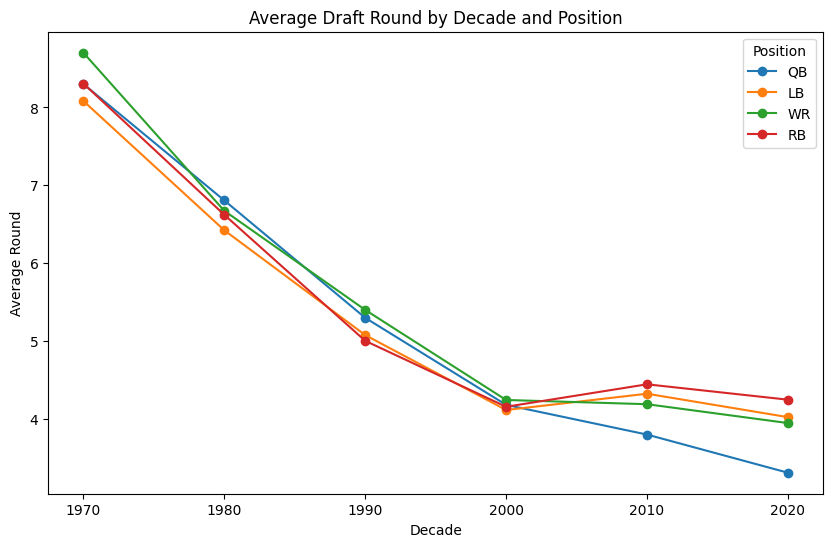

In [ ]:
#1:
df['decade'] = (df['year'] // 10) * 10

mean_round = (df.groupby(['decade', 'position'])['round'].mean().reset_index())

pivot = mean_round.pivot(index='decade', columns='position', values='round')

positions_of_interest = ['QB','LB','WR','RB']
pivot[positions_of_interest].plot(marker='o', figsize=(10,6))
plt.title('Average Draft Round by Decade and Position')
plt.xlabel('Decade')
plt.ylabel('Average Round')
plt.legend(title='Position')
plt.show()


**Insights for Question 1:**
- The drop in the data is largely due to the fact that the NFL changed the amount of rounds per draft: From 17 to 12 in 1978, then to 8 rounds for 1 year in 1983, then finally to 7 rounds in 1994.
- Taking this into account, teams have still trended to selecting QBs and WRs earlier compared to other positions.
- There is a slight jump in the data for RBs in the 2010s. This may reflect a change in strategies in the NFL like teams becoming more pass-heavy.

### 2. What’s the distribution of career AV (Approximate Value) by draft round?

<Figure size 1200x600 with 0 Axes>

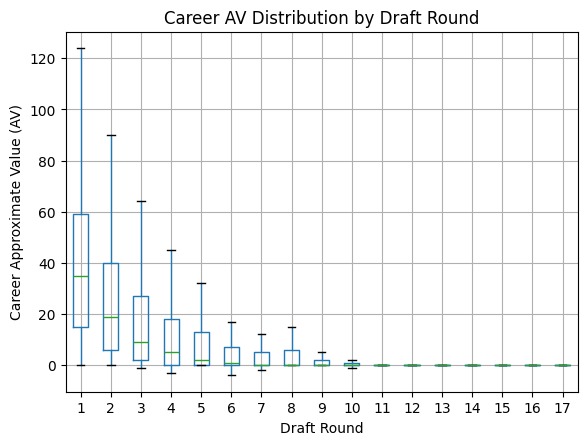

In [ ]:
#2:
plt.figure(figsize=(12,6))
df.boxplot(column='carAV', by='round', showfliers=False)
plt.suptitle('')  # remove default title
plt.title('Career AV Distribution by Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Career Approximate Value (AV)')
plt.show()

**Insights for Question 2:**
- The median declines rapidly from 35-40 in round 1, to below 10 by round 3 and gets closer to 0 in later rounds.
- In the later rounds, there are individual players whose career AV are higher than those in earlier rounds. These are the "hidden gems" I will look at in question 4.

### 3. What percentage of drafted players at each position played at least 50 games?

          total_players  pct_played_50
position                              
FB                   88      60.227273
NT                  138      47.101449
OLB                  73      43.835616
P                   162      43.827160
DE                 1275      42.901961
DB                 2489      42.587384
C                   440      42.500000
LB                 2001      40.829585
TE                  888      40.202703
G                   991      38.244198
T                  1145      37.816594
K                   184      36.413043
DT                 1006      35.785288
RB                 1764      31.519274
WR                 1915      31.383812
QB                  738      25.474255
S                   128      24.218750
CB                  189      19.576720
OL                   74      12.162162


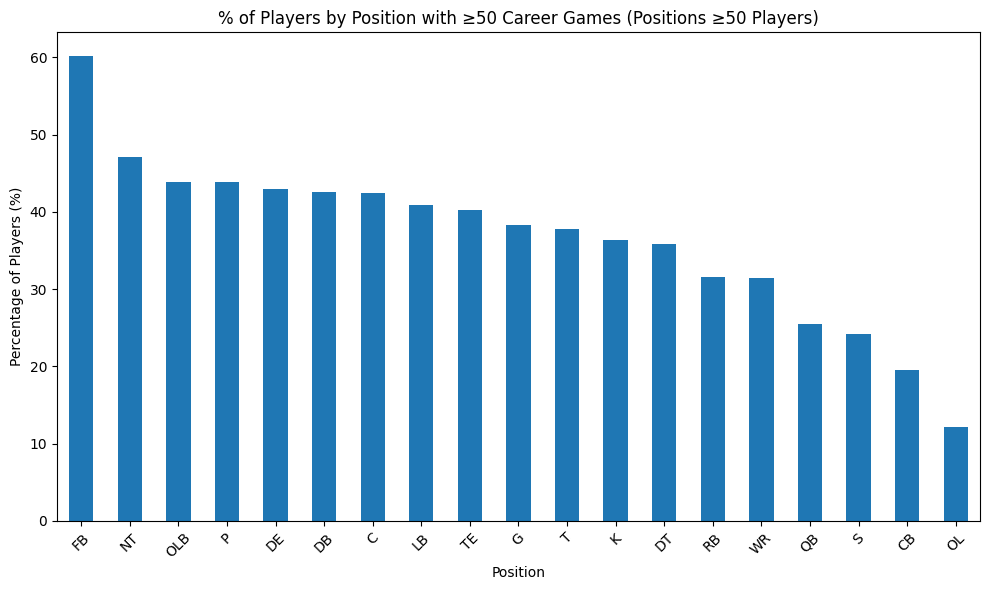

In [ ]:
#3.
df['played_50'] = df['games'] >= 50

pos_summary = (
    df.groupby('position')
      .agg(
          total_players = ('position', 'size'),
          pct_played_50  = ('played_50', lambda x: x.mean() * 100)
      )
      .sort_values('pct_played_50', ascending=False)
)

pos_summary_2 = pos_summary[pos_summary['total_players'] >= 50]

print(pos_summary_2)

plt.figure(figsize=(10,6))
pos_summary_2['pct_played_50'].plot(kind='bar')
plt.title('% of Players by Position with ≥50 Career Games (Positions ≥50 Players)')
plt.xlabel('Position')
plt.ylabel('Percentage of Players (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insights for Question 3:**
- Interior defensive players (Note Tackles, Outside Linebackers, Defensive Ends, and Defensive Backs) all have a fairly high percentage, suggesting they are valuable.
- Fullbacks (FB) are the highest percentage, but there are only 88 FBs ever drafted because it is a rarely used position.
- Quarterbacks (QB) and Wide Recievers (WR) both have fairly low percentages, reflecting how competitive these positions are and how difficult it is for a player to sustain peak performance.

### 4. Which franchise finds the most “hidden gems"? (Players drafted after round 5 who became All-Pros and/or made the Pro Bowl?)

team
MIA    16
GB     11
MIN    11
SF     11
DEN    10
DAL     9
WAS     9
PHI     9
NE      8
PIT     8
Name: hidden_gems, dtype: int64


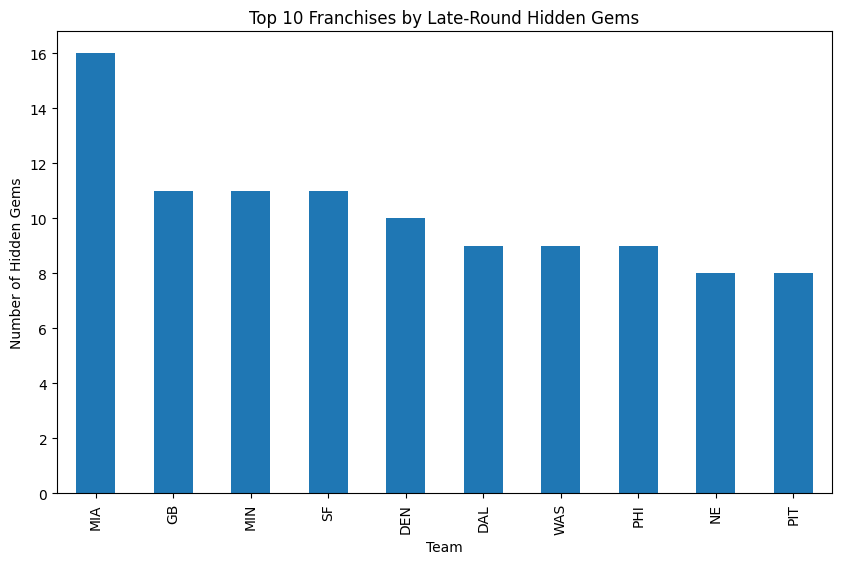

In [ ]:
#4:
hidden_gems = df[(df['round'] > 5) & ((df['all_pro'] > 0) | (df['pro_bowl'] > 0))]

gems_per_team = hidden_gems['team'].value_counts().rename('hidden_gems')

print(gems_per_team.head(10))

gems_per_team.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Franchises by Late-Round Hidden Gems')
plt.xlabel('Team')
plt.ylabel('Number of Hidden Gems')
plt.show()



**Insights for Question 4:**
- The Miami Dolphins lead by 5 with 16 hidden gems with the Green Bay Packers, Minnesota Vikings, and San Francisco 49ers ties at second.
- As expected, most of the teams in the top 10 are older NFL teams, with the youngest actually being the Miami Dolphins at number 1.

### 5. Identify the “best” and “worst” drafts (year + team) in terms of total AV yield.

In [ ]:
#5:
df_no21 = df[df['year'] != 2021]

av_by_draft = (
    df_no21
    .groupby(['year','team'])['carAV']
    .sum()
    .reset_index(name='total_AV')
)

# Top 5 drafts
best_overall = av_by_draft.nlargest(5, 'total_AV')
print("Top 5 Drafts (excl. 2021):")
print(best_overall)

# Bottom 5 drafts
worst_overall = av_by_draft.nsmallest(5, 'total_AV')
print("\nBottom 5 Drafts (excl. 2021):")
print(worst_overall)



Top 5 Drafts (excl. 2021):
     year team  total_AV
483  1987  PIT       508
46   1971  PIT       494
136  1975  DAL       471
355  1983  CHI       456
124  1974  PIT       454

Bottom 5 Drafts (excl. 2021):
      year team  total_AV
141   1975   KC         0
211   1977  WAS         0
183   1976  WAS         2
541   1989  RAI         2
1489  2020  HOU         2


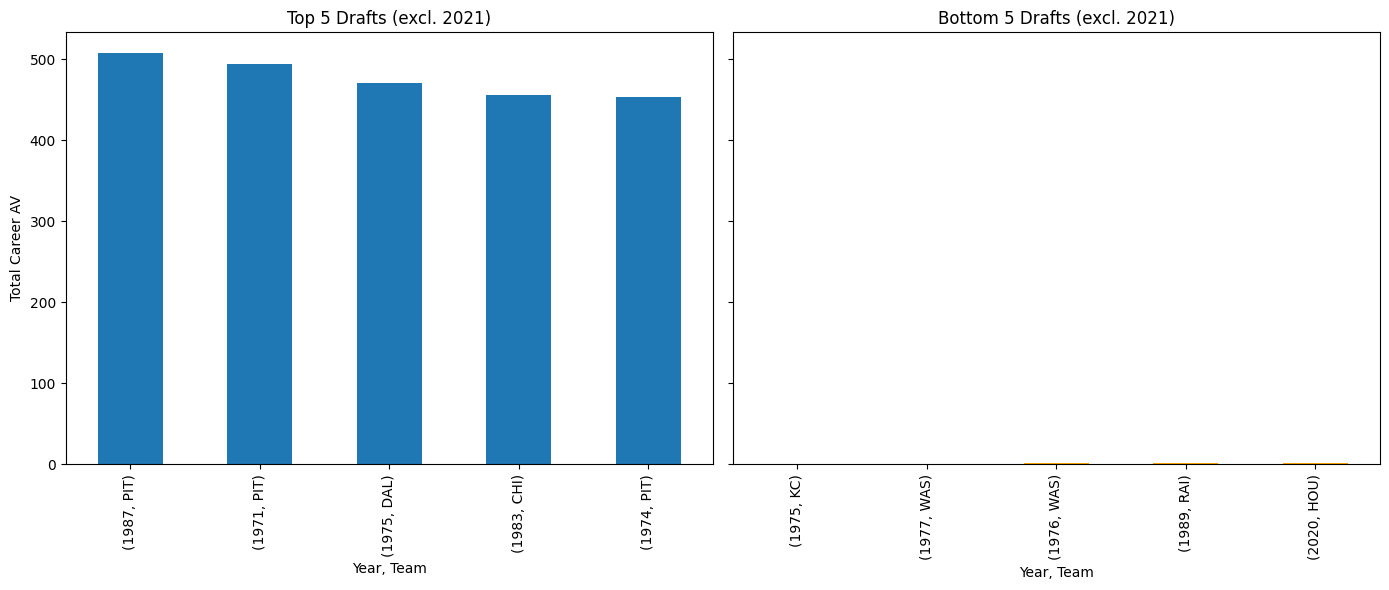

In [ ]:
#5 Graph:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

best_overall.set_index(['year','team'])['total_AV'] \
    .plot(kind='bar', ax=axes[0], title='Top 5 Drafts (excl. 2021)')
axes[0].set_xlabel('Year, Team')
axes[0].set_ylabel('Total Career AV')

worst_overall.set_index(['year','team'])['total_AV'] \
    .plot(kind='bar', ax=axes[1], title='Bottom 5 Drafts (excl. 2021)', color='orange')
axes[1].set_xlabel('Year, Team')

plt.tight_layout()
plt.show()

**Insights from Question 5:**
- The Pittsburgh Steelers had some very good drafts in the 70s and 80s, holding the 1st, 2nd, and 5th spot
- Washington had 2 of the worst drafts ever back to back in 1976 and 1977.

### 6. Analyze the distribution of “played_until – year” (career span) and see how it’s evolved (e.g. longer careers today?).

<Figure size 1200x600 with 0 Axes>

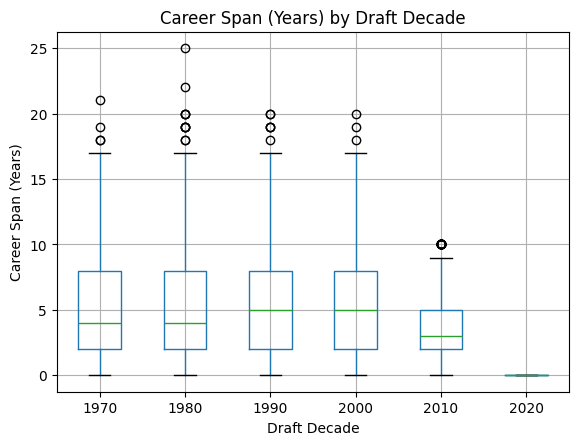

In [ ]:
#6:
df['career_span'] = df['played_until'] - df['year']
df = df[df['career_span'].between(0, 30)]

# Box Plot
plt.figure(figsize=(12,6))
df.boxplot(column='career_span', by='decade')
plt.suptitle('')
plt.title('Career Span (Years) by Draft Decade')
plt.xlabel('Draft Decade')
plt.ylabel('Career Span (Years)')
plt.show()


**Insights for Question 6:**
- The median for each decade is right around 5 except for 2010 and 2020 because the data only goes to 2021, so the average NFL career is about 4-5 years, looking only from 1970 - 2000.
- The player with the longest career played 25 seasons, with only 2 others also above 20 years.
- From 1970s to 2000s, the graphs are very similar with the exception of outliers. So, this shows the average length of an NFL career has had little-to-no change